In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading & Preproessing

In [2]:
inner = pd.read_csv('data/inner.csv',low_memory=False)
outer = pd.read_csv('data/outer.csv',low_memory=False)
left = pd.read_csv('data/left.csv',low_memory=False)
right = pd.read_csv('data/right.csv',low_memory=False)

In [3]:
def preprocess_time(df):
    for i in ['timestamp']:
        df[i] = pd.to_datetime(df[i])

    return df

def preprocess(dataframe):

    dataframe = dataframe.rename(columns={'humidity': 'humidity%'})
    column_to_dropna = 'value'
    dataframe = dataframe.dropna(subset=[column_to_dropna])
    dataframe = dataframe.pivot(
        index=dataframe.columns[:-2], columns='measurement', values='value').reset_index()
    dataframe['Compiled_Loaction'] = dataframe['text'].fillna('') + ' ' + dataframe['place'].fillna('') + ' ' + dataframe['region'].fillna('') + ' ' + dataframe['locality'].fillna('') + ' ' + dataframe['neighborhood'].fillna('') + ' ' + dataframe['country'].fillna('')+ dataframe['place_name'].fillna('')
    columns_to_drop = ['text', 'place', 'locality', 'neighborhood','place_name','postcode','uvi','dew_point','fkReadingsId']
    dataframe.drop(columns=columns_to_drop, inplace=True)
    dataframe['wind_gust'].fillna(dataframe['wind_gust'].mean(), inplace=True)
    dataframe['rain'].fillna(0, inplace=True)
    dataframe['snow'].fillna(0, inplace=True)
    dataframe['accuracy'].fillna(0, inplace=True)


    dataframe = preprocess_time(dataframe)

    dataframe = dataframe.sort_values(by='timestamp')

    dataframe.reset_index(drop=True, inplace=True)

    return dataframe

In [4]:
inner = preprocess(inner)
outer = preprocess(outer)
left = preprocess(left)
right = preprocess(right)

In [5]:
inner.drop_duplicates(inplace=True)
outer.drop_duplicates(inplace=True)
right.drop_duplicates(inplace=True)
left.drop_duplicates(inplace=True)

inner.reset_index(drop=True,inplace=True)
outer.reset_index(drop=True,inplace=True)
right.reset_index(drop=True,inplace=True)
left.reset_index(drop=True,inplace=True)

In [6]:
length = len(outer)
outer['merger_col'] = range(length)

length = len(inner)
inner['merger_col'] = range(length)

length = len(right)
right['merger_col'] = range(length)

length = len(left)
left['merger_col'] = range(length)

In [7]:
common_cols = set(inner.columns) & set(left.columns)

common_cols_same_values = []
for col in common_cols:
    if outer[col].equals(outer[col]):
        common_cols_same_values.append(col)

print("Columns with the same name and values across the inner and left DataFrames:")
print(common_cols_same_values)

different_cols = []
all_cols = set(inner.columns) | set(left.columns)
for col in all_cols:
    if col not in common_cols_same_values:
        different_cols.append(col)

print("\nColumns that don't match across the inner and left DataFrames:")
print(different_cols)


Columns with the same name and values across the inner and left DataFrames:
['accuracy', 'tsReceived', 'long', 'region', 'fkSensorSerialId', 'timestamp', 'fkLinkSerialId', 'heading', 'dt', 'sunset', 'Compiled_Loaction', 'country', 'speed', 'visibility', 'direction', 'wind_deg', 'place_type', 'lat', 'msla', 'wind_gust', 'snow', 'weatherid', 'sunrise', 'pkId', 'clouds', 'acceleration', 'temp', 'feels_like', 'wind_speed', 'humidity', 'humidity%', 'temperature', 'pressure', 'relevance', 'rain', 'merger_col']

Columns that don't match across the inner and left DataFrames:
[]


In [8]:
common_cols = set(inner.columns) & set(left.columns)

common_cols_same_values = []
for col in common_cols:
    if inner[col].equals(left[col]):
        common_cols_same_values.append(col)

print("Columns with the same name and values across the inner and left DataFrames:")
print(common_cols_same_values)

different_cols = []
all_cols = set(inner.columns) | set(left.columns)
for col in all_cols:
    if col not in common_cols_same_values:
        different_cols.append(col)

print("\nColumns that don't match across the inner and left DataFrames:")
print(different_cols)


Columns with the same name and values across the inner and left DataFrames:
['accuracy', 'tsReceived', 'long', 'region', 'fkSensorSerialId', 'timestamp', 'fkLinkSerialId', 'heading', 'dt', 'sunset', 'Compiled_Loaction', 'country', 'speed', 'visibility', 'direction', 'wind_deg', 'place_type', 'lat', 'msla', 'wind_gust', 'snow', 'weatherid', 'sunrise', 'pkId', 'clouds', 'acceleration', 'temp', 'feels_like', 'wind_speed', 'humidity', 'humidity%', 'temperature', 'pressure', 'relevance', 'rain', 'merger_col']

Columns that don't match across the inner and left DataFrames:
[]


Since inner and left are the same and outer and right are also the same we are going to only use inner and outer

In [9]:
outer = outer[:inner.shape[0]]

In [10]:
common_cols = set(inner.columns) & set(outer.columns)

common_cols_same_values = []
for col in common_cols:
    if inner[col].equals(outer[col]):
        common_cols_same_values.append(col)

print("Columns with the same name and values across the inner and left DataFrames:")
print(common_cols_same_values)

different_cols = []
all_cols = set(inner.columns) | set(outer.columns)
for col in all_cols:
    if col not in common_cols_same_values:
        different_cols.append(col)

print("\nColumns that don't match across the inner and left DataFrames:")
print(different_cols)


Columns with the same name and values across the inner and left DataFrames:
['accuracy', 'tsReceived', 'long', 'region', 'fkSensorSerialId', 'timestamp', 'fkLinkSerialId', 'dt', 'sunset', 'Compiled_Loaction', 'country', 'direction', 'place_type', 'lat', 'wind_gust', 'snow', 'sunrise', 'temp', 'feels_like', 'wind_speed', 'humidity', 'temperature', 'relevance', 'rain', 'merger_col']

Columns that don't match across the inner and left DataFrames:
['heading', 'speed', 'visibility', 'wind_deg', 'msla', 'weatherid', 'pkId', 'clouds', 'acceleration', 'humidity%', 'pressure']


In [11]:
merged_df = pd.merge(inner, outer, on=common_cols_same_values, suffixes=['_inner','_outer'])
merged_df.drop(['pkId_outer','pkId_inner','tsReceived'],axis = 1,inplace=True)
merged_df.dropna(inplace=True)

In [12]:
merged_df['DayofTheweek'] = merged_df['timestamp'].dt.dayofweek
merged_df['HourOfDay'] = merged_df['timestamp'].dt.hour 
merged_df['DayOfMonth'] = merged_df['timestamp'].dt.day 
merged_df['temperature'] = pd.to_numeric(merged_df['temperature'], errors='coerce')
merged_df = merged_df[merged_df['temperature'] <= 40]

## Analytics

In [13]:
merged_df['temperature'] = pd.to_numeric(merged_df['temperature'], errors='coerce')
geolocation_data = ['lat', 'long', 'Compiled_Loaction','country','region','humidity','temperature']
external_weather_data = ['sunrise', 'sunset', 'temp', 'feels_like', 'pressure_inner', 'humidity%_inner', 'clouds_inner', 'visibility_inner', 'wind_speed', 'wind_gust', 'wind_deg_inner', 'rain', 'snow','wind_deg_outer','visibility_outer', 'clouds_outer','humidity%_outer','humidity','temperature']
timestamp_data = ['timestamp', 'DayofTheweek', 'HourOfDay', 'DayOfMonth','humidity','temperature']
internal_microclimate_data = ['humidity', 'temperature','msla_outer', 'pressure_outer']

## Time

In [14]:
plt.style.use('seaborn')

C:\Users\user\AppData\Local\Temp\ipykernel_18552\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [15]:
timestamp_df = merged_df[timestamp_data]

### Temperature

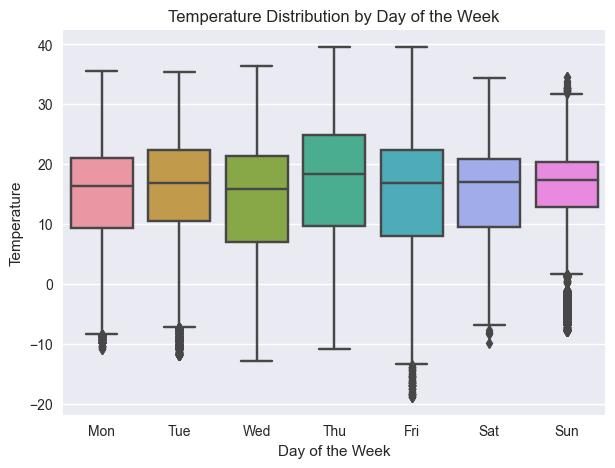

In [16]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='DayofTheweek', y='temperature', data=timestamp_df)
plt.xlabel('Day of the Week')
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show();

In [17]:
mean_temperatures = merged_df.groupby(['DayofTheweek', 'country'])['temperature'].mean().unstack()

In [18]:
mean_temperatures.to_csv('p.csv')

<Figure size 1000x600 with 0 Axes>

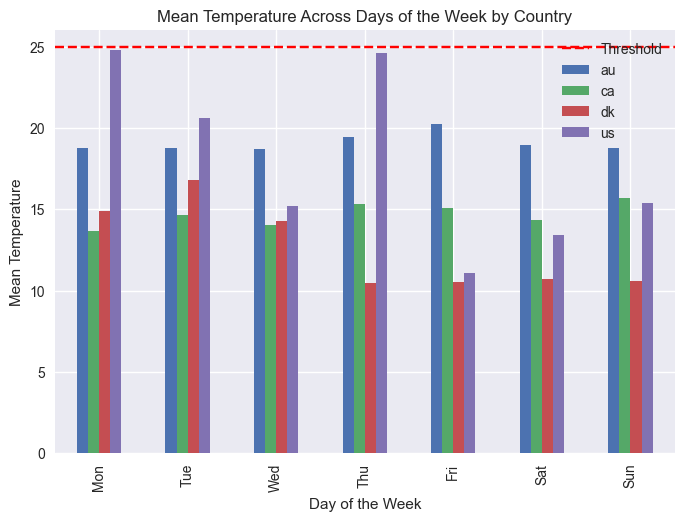

In [19]:
mean_temperatures = merged_df.groupby(['DayofTheweek', 'country'])['temperature'].mean().unstack()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
mean_temperatures.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Across Days of the Week by Country')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
region_labels = mean_temperatures.columns
plt.axhline(y=25, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.show();


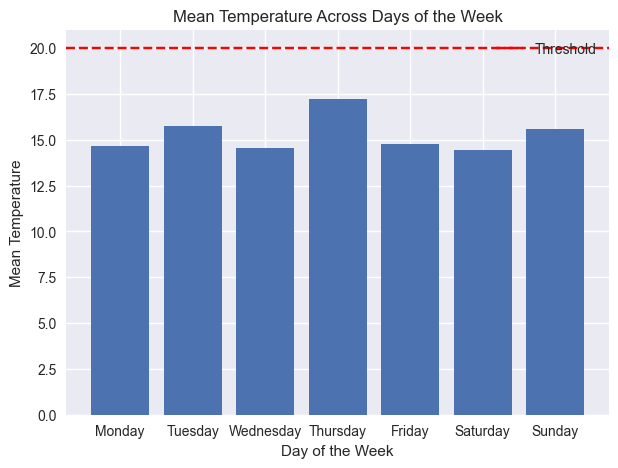

In [20]:
mean_temperatures = timestamp_df.groupby('DayofTheweek')['temperature'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(7,5))
plt.bar(days, mean_temperatures)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Across Days of the Week')
plt.axhline(y=20, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show();

In [21]:
mean_temperatures

DayofTheweek
0    14.637934
1    15.748069
2    14.535223
3    17.237569
4    14.781032
5    14.432411
6    15.603497
Name: temperature, dtype: float64

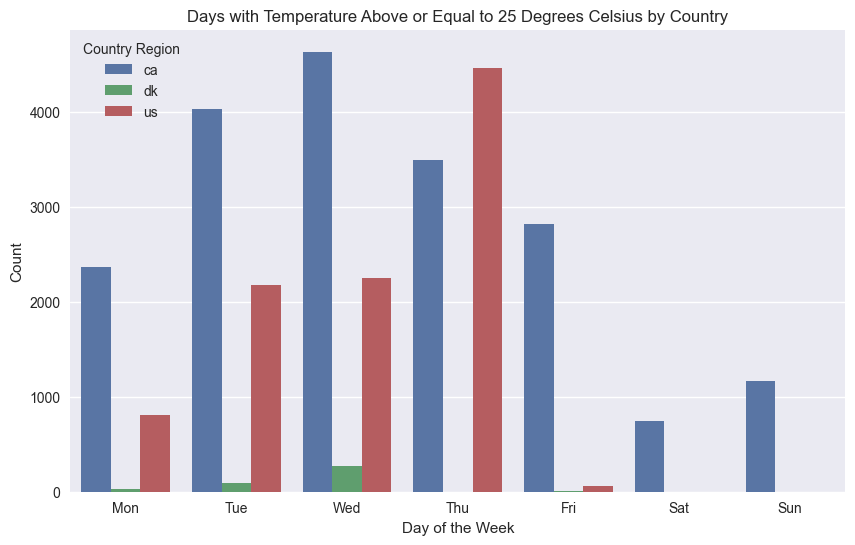

In [22]:
import seaborn as sns

filtered_df = merged_df[merged_df['temperature'] >= 25].copy()

filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

filtered_df['day_of_week'] = filtered_df['timestamp'].dt.dayofweek

count_by_day = filtered_df.groupby(['day_of_week', 'country']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='count', hue='country', data=count_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Days with Temperature Above or Equal to 25 Degrees Celsius by Country')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Country Region')

plt.show();


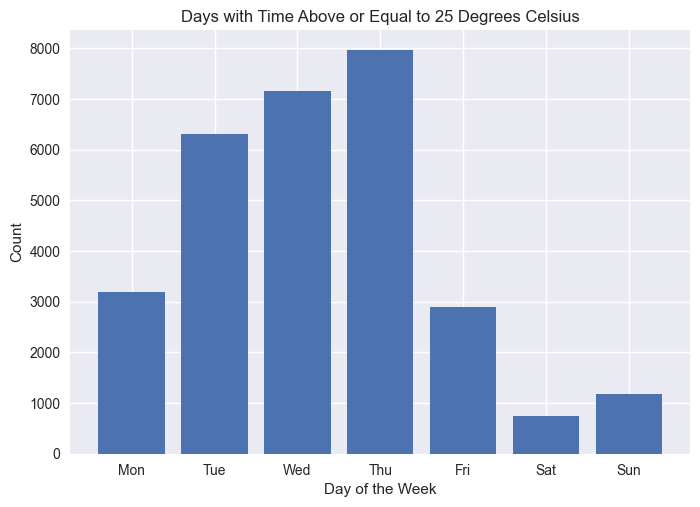

In [23]:
filtered_df = timestamp_df[timestamp_df['temperature'] >= 25].copy()

filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

filtered_df['day_of_week'] = filtered_df['timestamp'].dt.dayofweek

count_by_day = filtered_df.groupby('day_of_week').size()

max_count = count_by_day.max()
days_with_max_count = count_by_day[count_by_day == max_count].index.tolist()

plt.bar(count_by_day.index, count_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Days with Time Above or Equal to 25 Degrees Celsius')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show();

In [24]:
count_by_day

day_of_week
0    3201
1    6303
2    7159
3    7962
4    2888
5     747
6    1171
dtype: int64

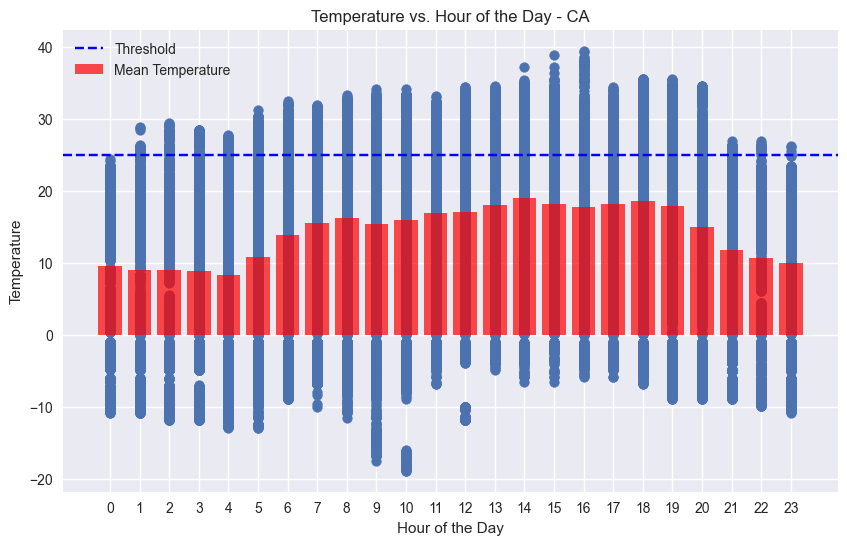

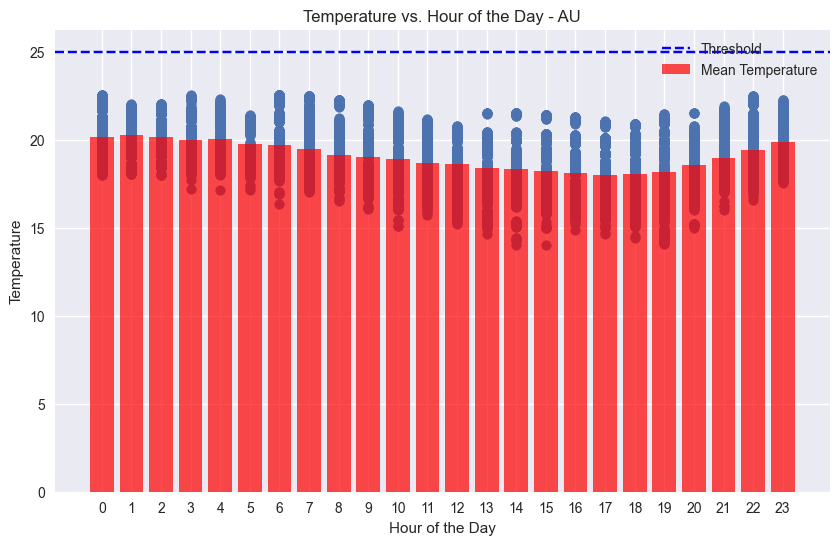

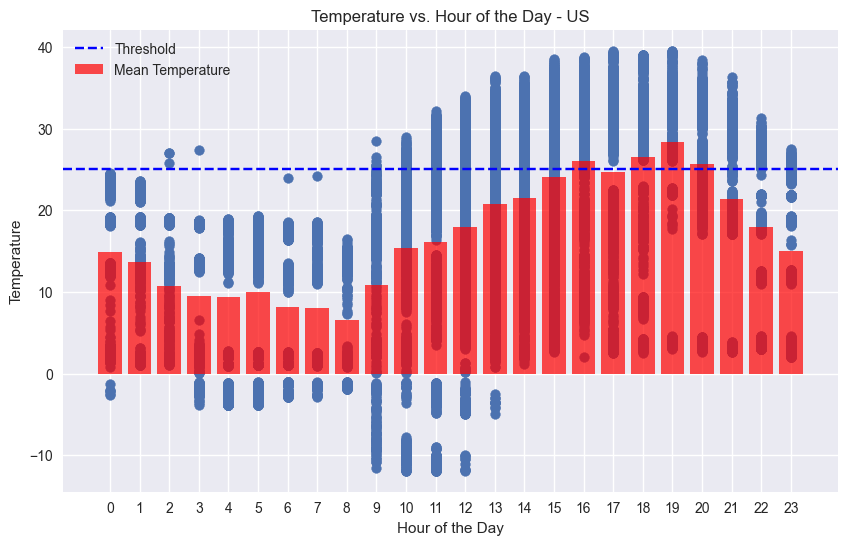

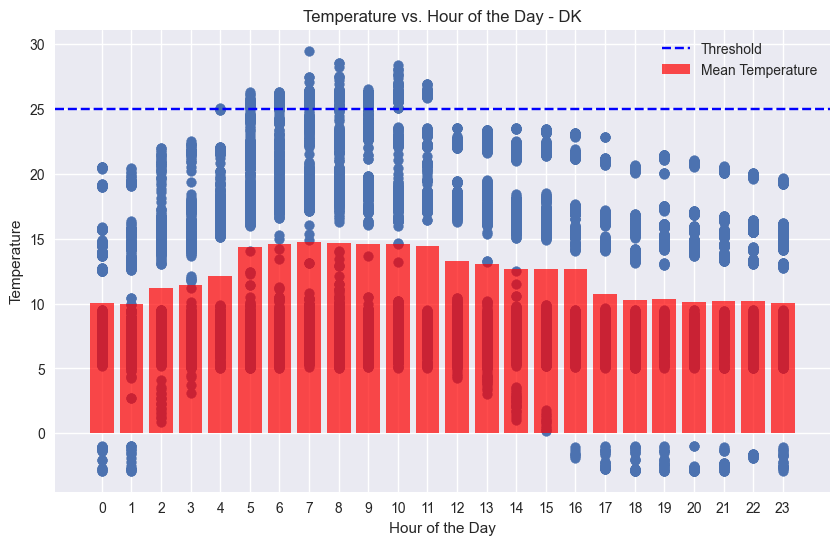

In [25]:

col_countries = ['ca', 'au', 'us', 'dk']

for country in col_countries:
    filtered_df = merged_df[merged_df['country'] == country]

    mean_temperatures = filtered_df.groupby('HourOfDay')['temperature'].mean()

    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['HourOfDay'], filtered_df['temperature'])
    plt.xlabel('Hour of the Day')
    plt.xticks(range(24))
    plt.ylabel('Temperature')
    plt.title(f'Temperature vs. Hour of the Day - {country.upper()}')

    plt.bar(mean_temperatures.index, mean_temperatures.values, color='red', alpha=0.7, label='Mean Temperature')
    plt.legend()
    
    plt.axhline(y=25, color='blue', linestyle='--', label='Threshold')
    plt.legend()

    plt.show();


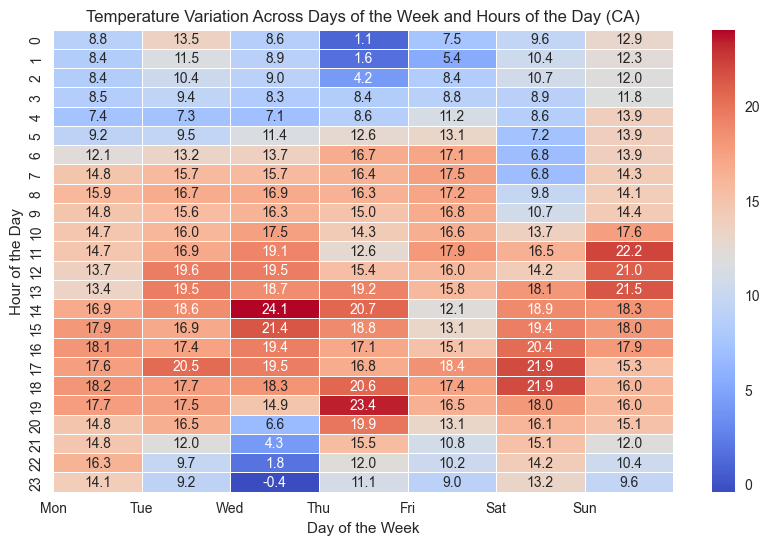

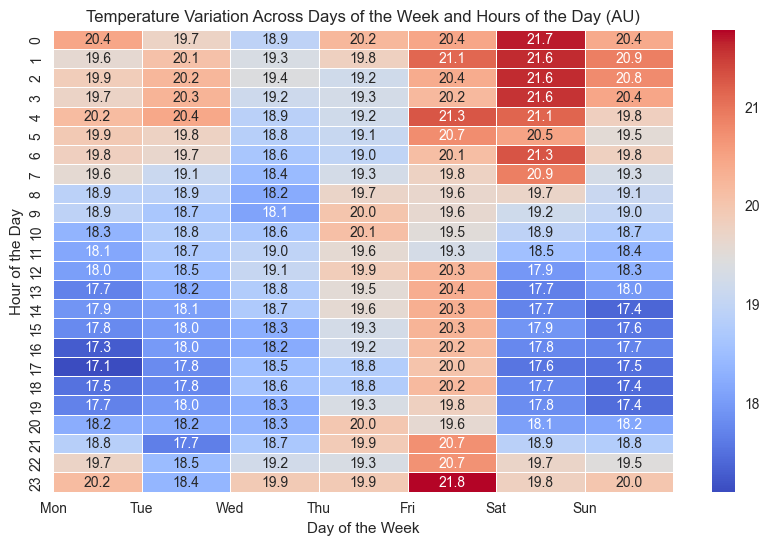

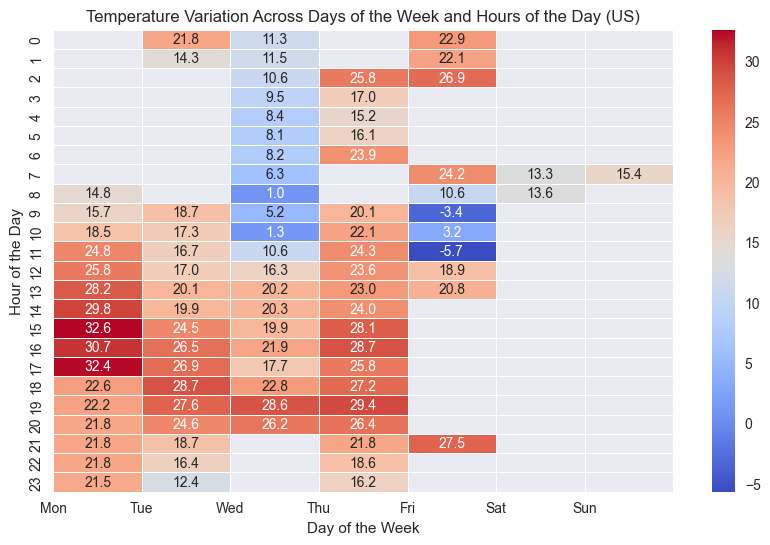

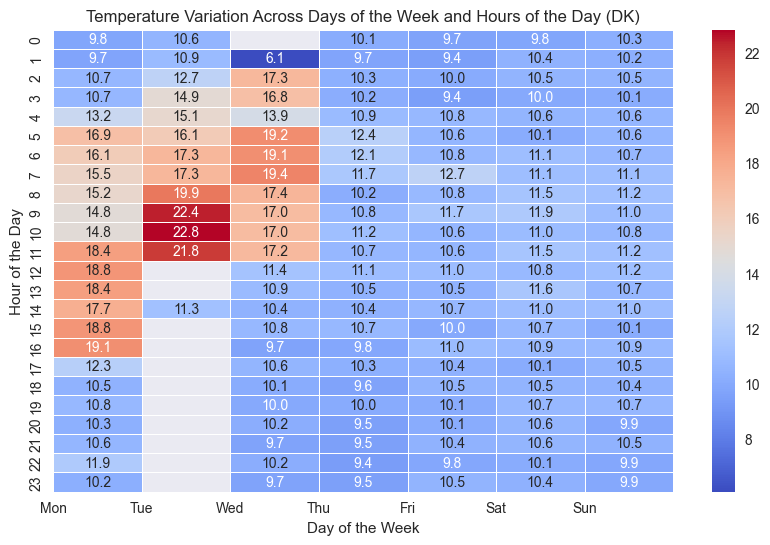

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['ca', 'au', 'us', 'dk']

for country in countries:
    country_df = merged_df[merged_df['country'] == country]
    temperature_heatmap = country_df.pivot_table(index='HourOfDay', columns='DayofTheweek', values='temperature')
    plt.figure(figsize=(10, 6))
    sns.heatmap(temperature_heatmap, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
    plt.xlabel('Day of the Week')
    plt.ylabel('Hour of the Day')
    plt.title(f'Temperature Variation Across Days of the Week and Hours of the Day ({country.upper()})')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show();


### Humidity

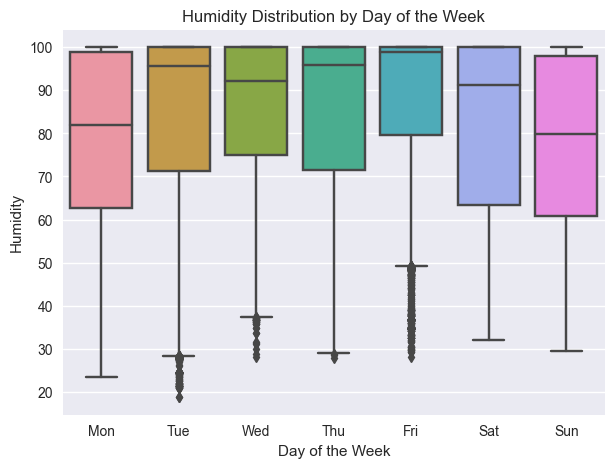

In [27]:
# Box Plot
plt.figure(figsize=(7, 5))
sns.boxplot(x='DayofTheweek', y='humidity', data=timestamp_df)
plt.xlabel('Day of the Week')
plt.ylabel('Humidity')
plt.title('Humidity Distribution by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show();

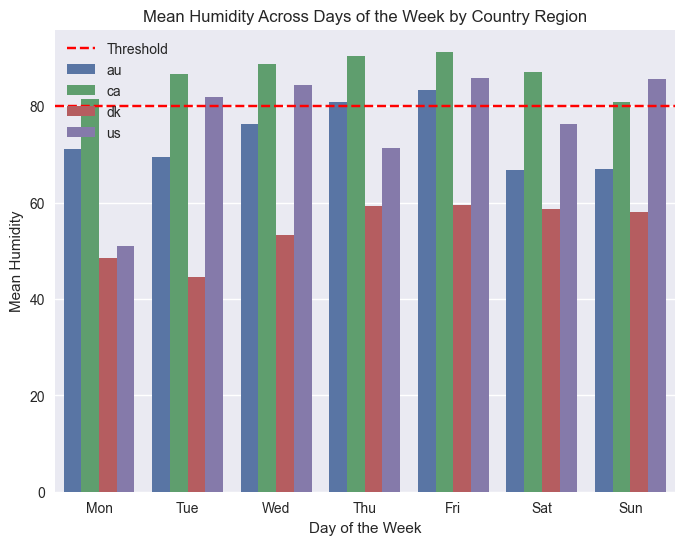

In [28]:
import seaborn as sns
mean_humidity = merged_df.groupby(['DayofTheweek', 'country'])['humidity'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='DayofTheweek', y='humidity', hue='country', data=mean_humidity)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity Across Days of the Week by Country Region')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Country Region')

# Draw a horizontal line at y=80
plt.axhline(y=80, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.show();


In [29]:
mean_humidity

,DayofTheweek,country,humidity
0,0,au,71.095717
1,0,ca,81.571843
2,0,dk,48.406480
3,0,us,50.931739
4,1,au,69.448809
5,1,ca,86.684423
6,1,dk,44.610140
7,1,us,81.976321
8,2,au,76.296621
9,2,ca,88.795467


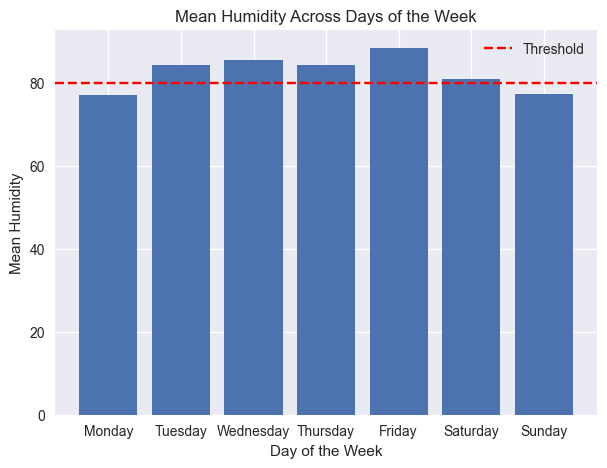

In [30]:
mean_humidity = timestamp_df.groupby('DayofTheweek')['humidity'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(7, 5))
plt.bar(days, mean_humidity)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity Across Days of the Week')
plt.axhline(y=80, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.show();


In [31]:
mean_humidity

DayofTheweek
0    77.089853
1    84.318373
2    85.457323
3    84.351638
4    88.434270
5    81.005991
6    77.239931
Name: humidity, dtype: float64

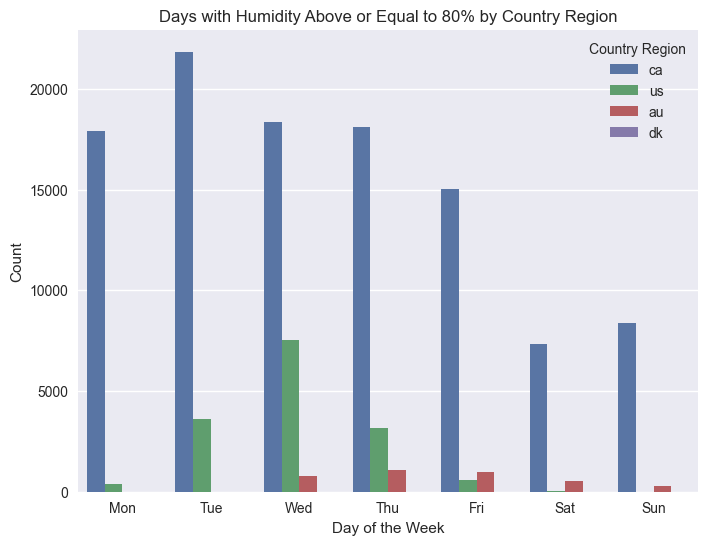

In [32]:
import seaborn as sns
filtered_df = merged_df[merged_df['humidity'] >= 80].copy()
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df['day_of_week'] = filtered_df['timestamp'].dt.dayofweek
count_by_day = filtered_df.groupby(['day_of_week', 'country']).size().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_week', y=0, hue='country', data=count_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Days with Humidity Above or Equal to 80% by Country Region')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Country Region')

plt.show();


In [33]:
count_by_day.to_csv('p.csv',index=False)

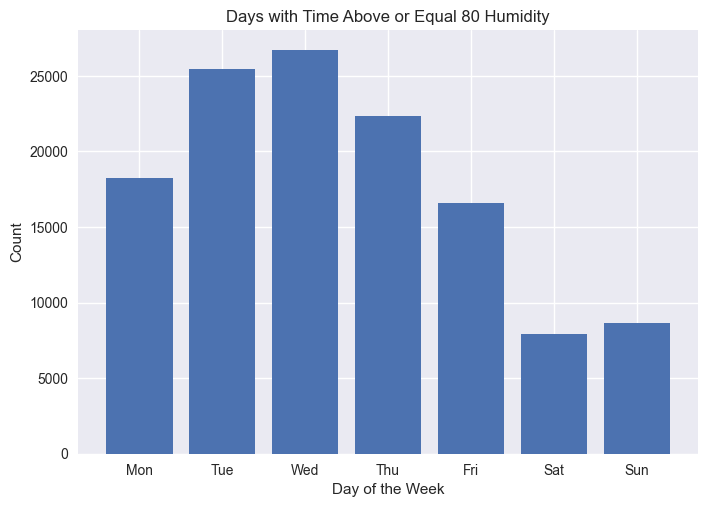

In [34]:
filtered_df = timestamp_df[timestamp_df['humidity'] >= 80].copy()

# Convert 'timestamp' column to datetime format
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# Extract day of the week
filtered_df['day_of_week'] = filtered_df['timestamp'].dt.dayofweek

# Group by day of the week and calculate count of rows
count_by_day = filtered_df.groupby('day_of_week').size()

# Determine the day(s) with the maximum count
max_count = count_by_day.max()
days_with_max_count = count_by_day[count_by_day == max_count].index.tolist()

# Plotting
plt.bar(count_by_day.index, count_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Days with Time Above or Equal 80 Humidity')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show();

In [35]:
count_by_day

day_of_week
0    18269
1    25442
2    26688
3    22371
4    16573
5     7920
6     8663
dtype: int64

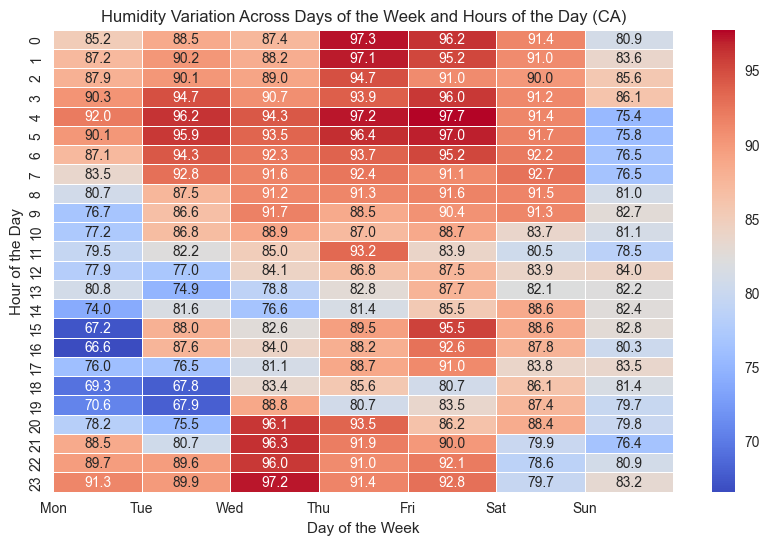

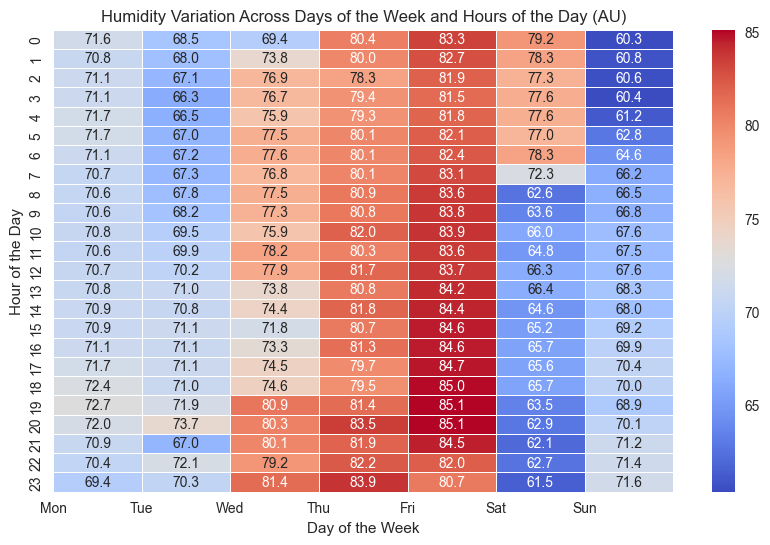

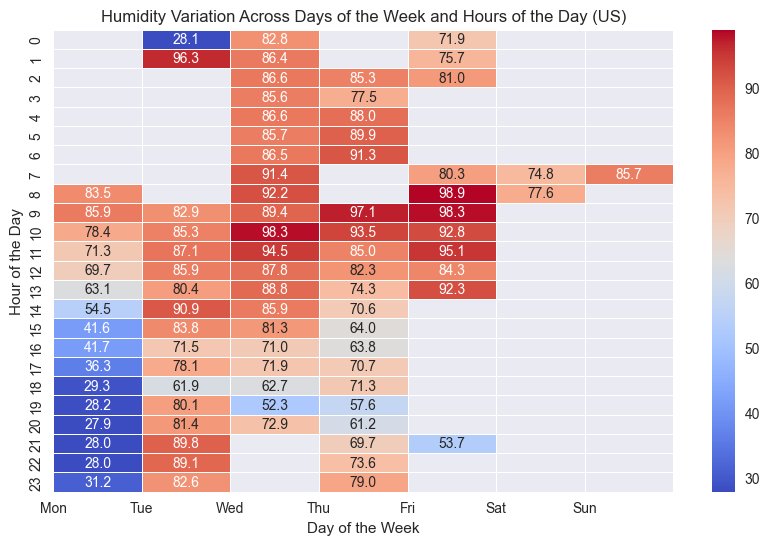

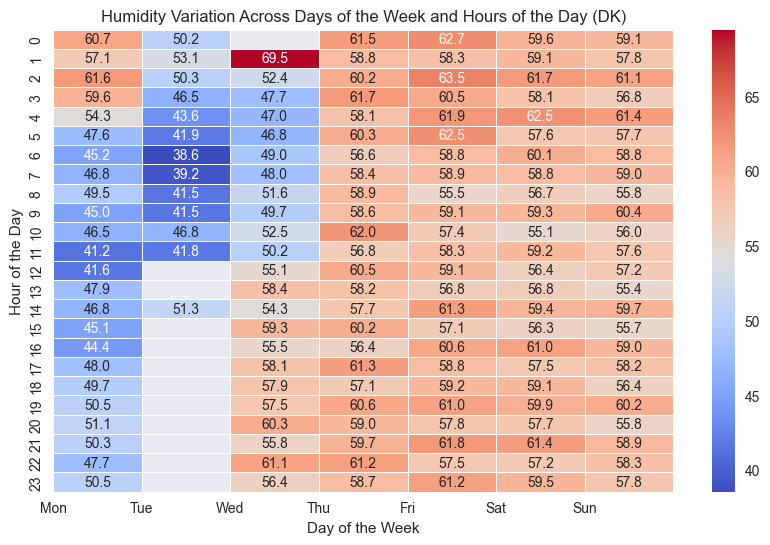

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['ca', 'au', 'us', 'dk']

for country in countries:
    # Filter dataframe for the specific country
    country_df = merged_df[merged_df['country'] == country]

    # Pivot table for the heatmap
    temperature_heatmap = country_df.pivot_table(index='HourOfDay', columns='DayofTheweek', values='humidity')

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(temperature_heatmap, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
    plt.xlabel('Day of the Week')
    plt.ylabel('Hour of the Day')
    plt.title(f'Humidity Variation Across Days of the Week and Hours of the Day ({country.upper()})')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show();


## Geolocation

In [37]:
geolocation = merged_df[geolocation_data]

### Temperature

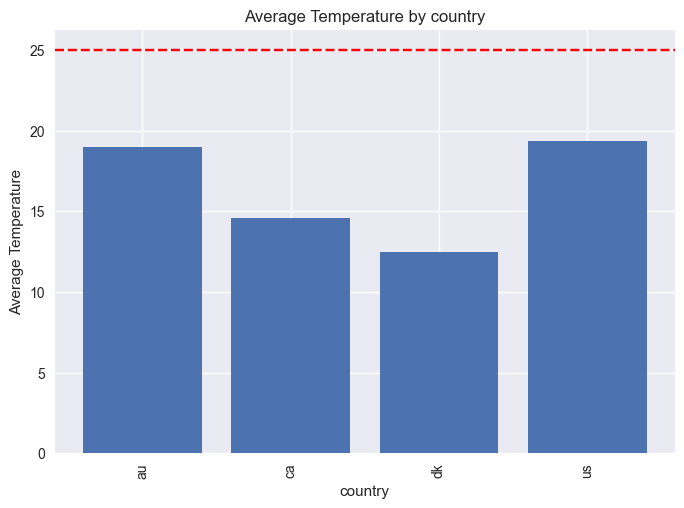

In [38]:
average_temperature_country = geolocation.groupby('country')['temperature'].mean()
plt.bar(average_temperature_country.index, average_temperature_country)
plt.xlabel('country')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by country')
plt.xticks(rotation=90)
plt.axhline(25, color='red', linestyle='--')  # Add a line at 25
plt.show();

In [39]:
average_temperature_country

country
au    19.000406
ca    14.580728
dk    12.492934
us    19.381653
Name: temperature, dtype: float64

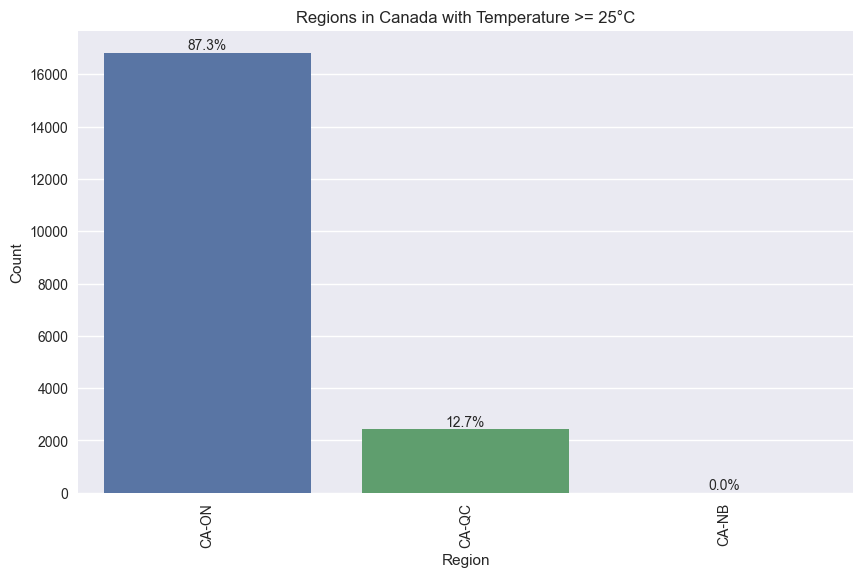

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'ca') & (merged_df['temperature'] >= 25)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title('Regions in Canada with Temperature >= 25°C')
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with temperature >= 25°C in Canada.")


In [41]:
region_counts

CA-ON    16827
CA-QC     2438
CA-NB        1
Name: region, dtype: int64

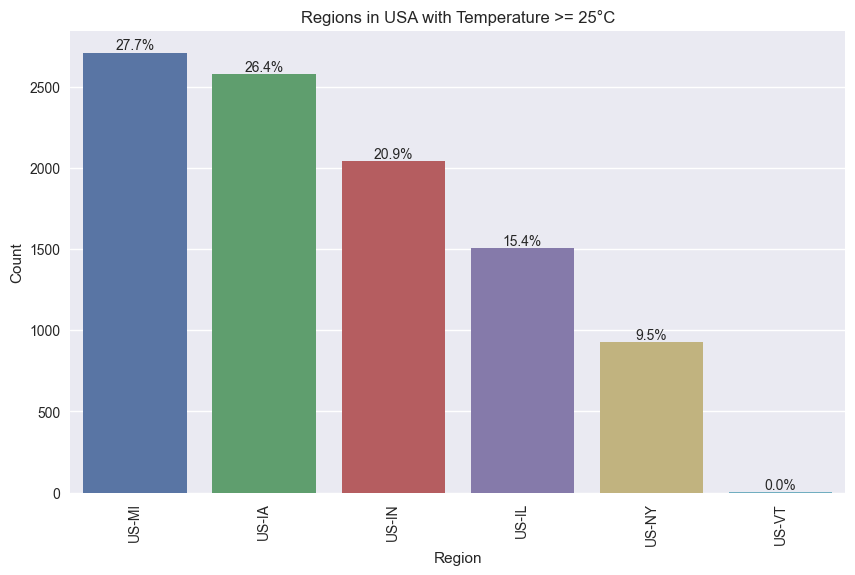

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'us') & (merged_df['temperature'] >= 25)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title('Regions in USA with Temperature >= 25°C')
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with temperature >= 25°C in USA.")


In [43]:
region_counts

US-MI    2709
US-IA    2578
US-IN    2043
US-IL    1505
US-NY     928
US-VT       2
Name: region, dtype: int64

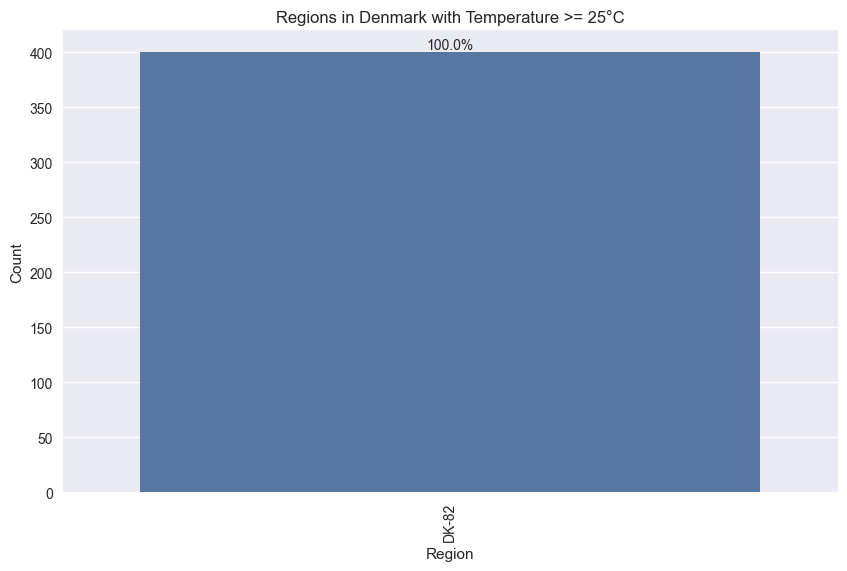

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'dk') & (merged_df['temperature'] >= 25)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title('Regions in Denmark with Temperature >= 25°C')
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with temperature >= 25°C in Denmark.")


In [45]:
region_counts

DK-82    400
Name: region, dtype: int64

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'au') & (merged_df['temperature'] >= 25)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title('Regions in Australia with Temperature >= 25°C')
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with temperature >= 25°C in Australia.")


No regions found with temperature >= 25°C in Australia.


In [47]:
average_temperature_country

country
au    19.000406
ca    14.580728
dk    12.492934
us    19.381653
Name: temperature, dtype: float64

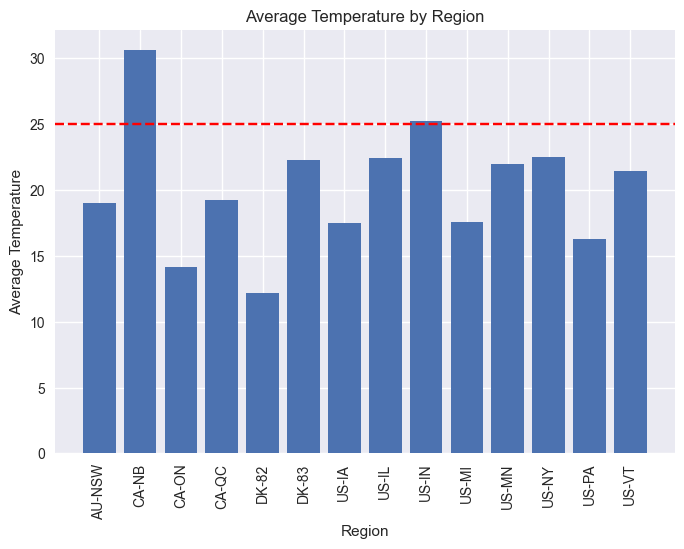

In [48]:

average_temperature_region = geolocation.groupby('region')['temperature'].mean()
plt.bar(average_temperature_region.index, average_temperature_region)
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Region')
plt.xticks(rotation=90)
plt.axhline(25, color='red', linestyle='--')  # Add a line at 25
plt.show();


In [49]:
average_temperature_region

region
AU-NSW    19.000406
CA-NB     30.630000
CA-ON     14.189684
CA-QC     19.238743
DK-82     12.153863
DK-83     22.252992
US-IA     17.529743
US-IL     22.474757
US-IN     25.216320
US-MI     17.547325
US-MN     21.987474
US-NY     22.540685
US-PA     16.318259
US-VT     21.414000
Name: temperature, dtype: float64

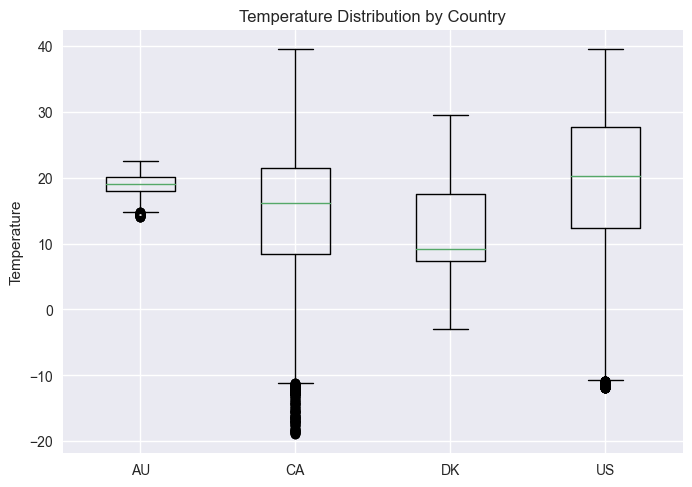

In [50]:
plt.boxplot([geolocation.loc[geolocation['country'] == 'au', 'temperature'],
             geolocation.loc[geolocation['country'] == 'ca', 'temperature'],
             geolocation.loc[geolocation['country'] == 'dk', 'temperature'],
             geolocation.loc[geolocation['country'] == 'us', 'temperature']])
plt.xticks([1, 2,3,4], ['AU', 'CA','DK','US'])
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Country')
plt.show();


### Humidity

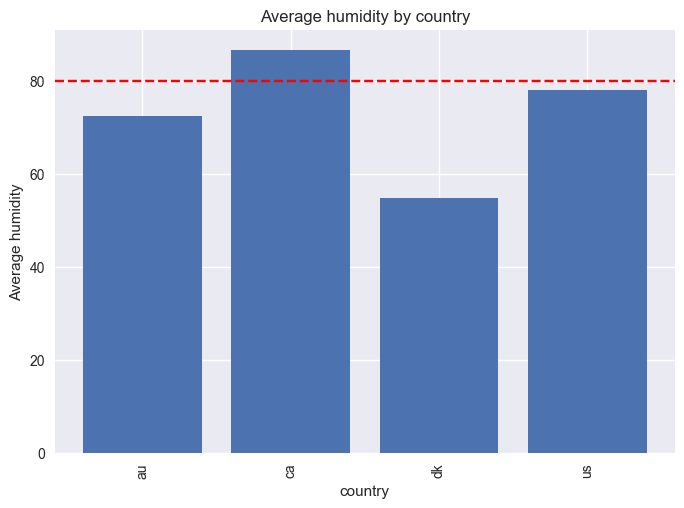

In [51]:
average_humidity_country = geolocation.groupby('country')['humidity'].mean()
plt.bar(average_humidity_country.index, average_humidity_country)
plt.xlabel('country')
plt.ylabel('Average humidity')
plt.title('Average humidity by country')
plt.xticks(rotation=90)
plt.axhline(80, color='red', linestyle='--')  # Add a line at 25
plt.show();

In [52]:
average_humidity_country

country
au    72.394189
ca    86.668693
dk    54.854999
us    78.012765
Name: humidity, dtype: float64

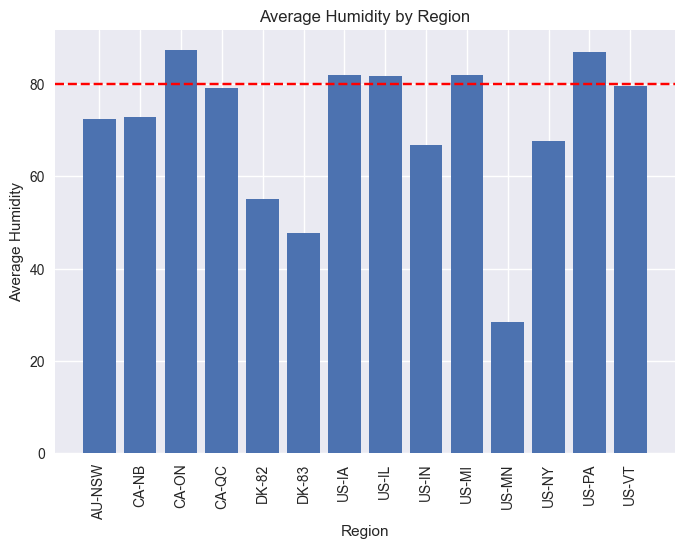

In [53]:
average_humidity = geolocation.groupby('region')['humidity'].mean()
plt.bar(average_humidity.index, average_humidity)
plt.xlabel('Region')
plt.ylabel('Average Humidity')
plt.title('Average Humidity by Region')
plt.xticks(rotation=90)
plt.axhline(80, color='red', linestyle='--')
plt.show();


In [54]:
average_humidity

region
AU-NSW    72.394189
CA-NB     72.910000
CA-ON     87.310317
CA-QC     79.024730
DK-82     55.105634
DK-83     47.640525
US-IA     81.947000
US-IL     81.766157
US-IN     66.688122
US-MI     81.893927
US-MN     28.358591
US-NY     67.718758
US-PA     86.972074
US-VT     79.611000
Name: humidity, dtype: float64

In [55]:
print(merged_df[(merged_df['temperature']<=25)&(merged_df['humidity']<=80)].describe())

measurement   speed_inner  acceleration_inner  heading_inner    msla_inner  \
count        50541.000000             50541.0   50541.000000  50541.000000   
mean            19.619121                 1.0      43.963535    194.223007   
std             38.013282                 0.0      91.940920    131.640394   
min              0.000000                 1.0       0.000000    -75.000000   
25%              0.000000                 1.0       0.000000     68.000000   
50%              0.000000                 1.0       0.000000    188.000000   
75%              1.000000                 1.0       0.000000    347.000000   
max            117.000000                 1.0     359.000000    526.000000   

measurement           lat          long          temp    feels_like  \
count        50541.000000  50541.000000  50541.000000  50541.000000   
mean            35.216838    -27.500330     11.258539      9.857278   
std             28.603340     81.999169      6.634195      7.782999   
min          

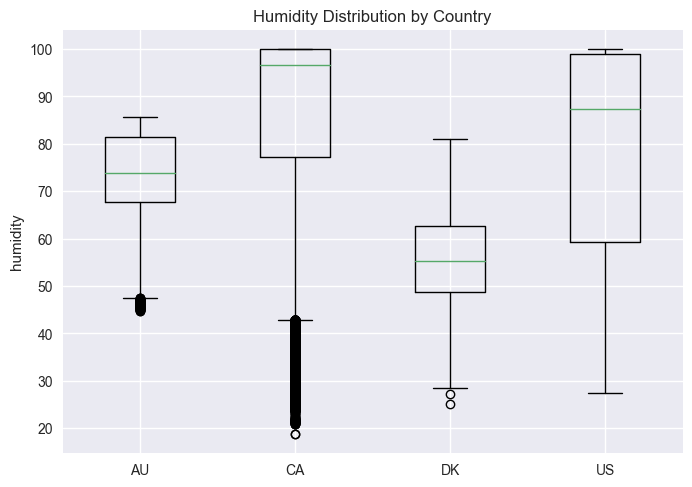

In [56]:
plt.boxplot([geolocation.loc[geolocation['country'] == 'au', 'humidity'],
             geolocation.loc[geolocation['country'] == 'ca', 'humidity'],
             geolocation.loc[geolocation['country'] == 'dk', 'humidity'],
             geolocation.loc[geolocation['country'] == 'us', 'humidity']])
plt.xticks([1, 2,3,4], ['AU', 'CA','DK','US'])
plt.ylabel('humidity')
plt.title('Humidity Distribution by Country')
plt.show();


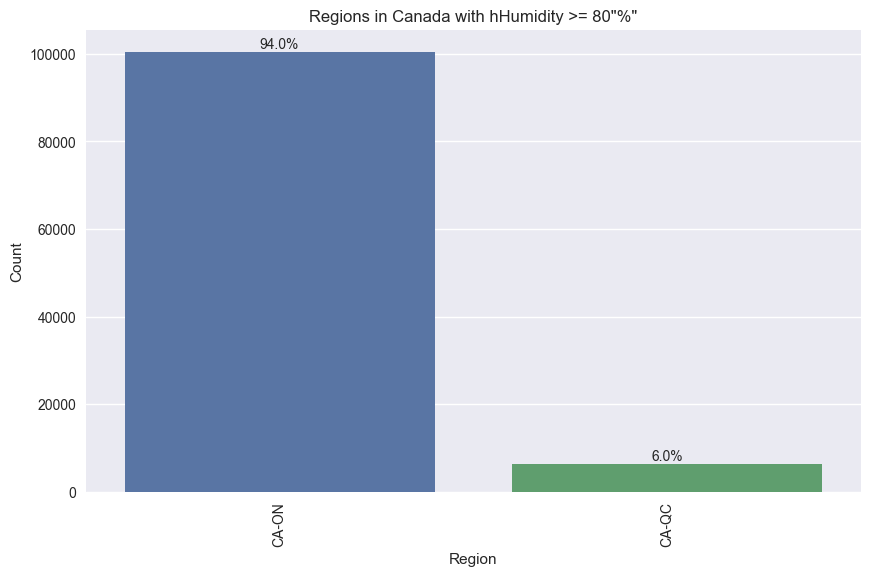

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'ca') & (merged_df['humidity'] >= 80)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title('Regions in Canada with hHumidity >= 80"%"')
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with Humidity >= 80'%' in Canada.")


In [58]:
region_counts

CA-ON    100500
CA-QC      6416
Name: region, dtype: int64

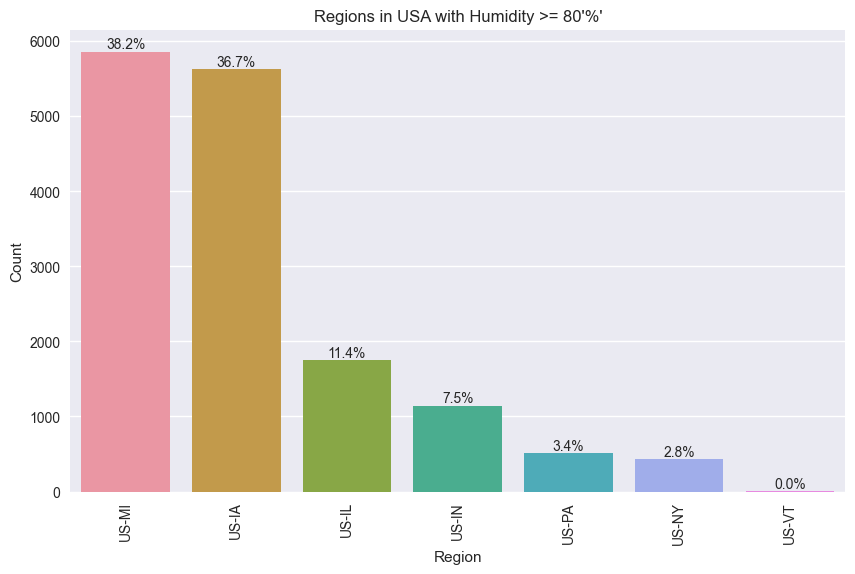

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'us') & (merged_df['humidity'] >= 80)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title("Regions in USA with Humidity >= 80'%'")
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with Humidity >= 80'%' in USA.")


In [60]:
region_counts

US-MI    5859
US-IA    5621
US-IL    1749
US-IN    1145
US-PA     514
US-NY     433
US-VT       4
Name: region, dtype: int64

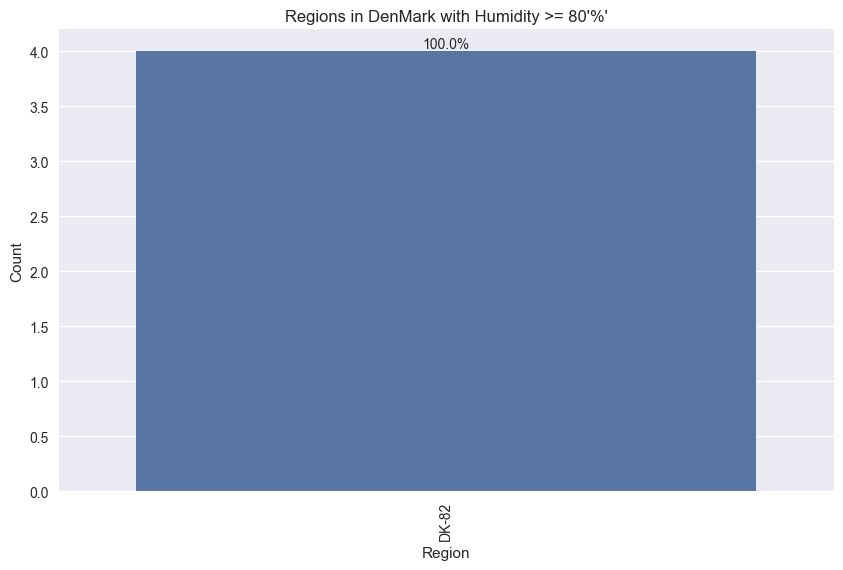

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'dk') & (merged_df['humidity'] >= 80)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title("Regions in DenMark with Humidity >= 80'%'")
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with Humidity >= 80'%' in DenMark.")


In [62]:
region_counts

DK-82    4
Name: region, dtype: int64

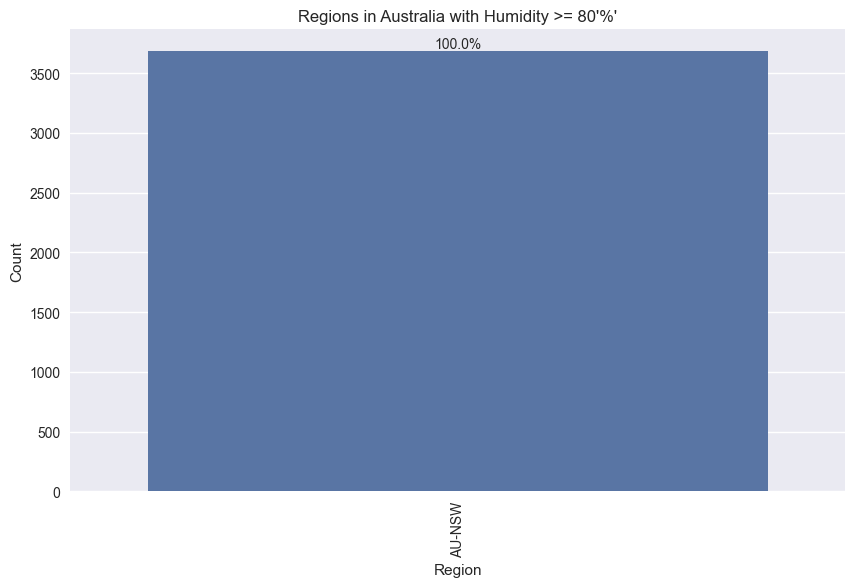

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for country 'CA' and temperature >= 25
filtered_df = merged_df[(merged_df['country'] == 'au') & (merged_df['humidity'] >= 80)]

# Count the occurrences of each region
region_counts = filtered_df['region'].value_counts()

# Check if there are regions with counts
if len(region_counts) > 0:
    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=region_counts.index, y=region_counts.values)
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title("Regions in Australia with Humidity >= 80'%'")
    plt.xticks(rotation=90)

    # Add percentage labels on top of the bars
    total = len(filtered_df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show();
else:
    print("No regions found with Humidity >= 80'%' in Australia.")


In [64]:
region_counts

AU-NSW    3681
Name: region, dtype: int64

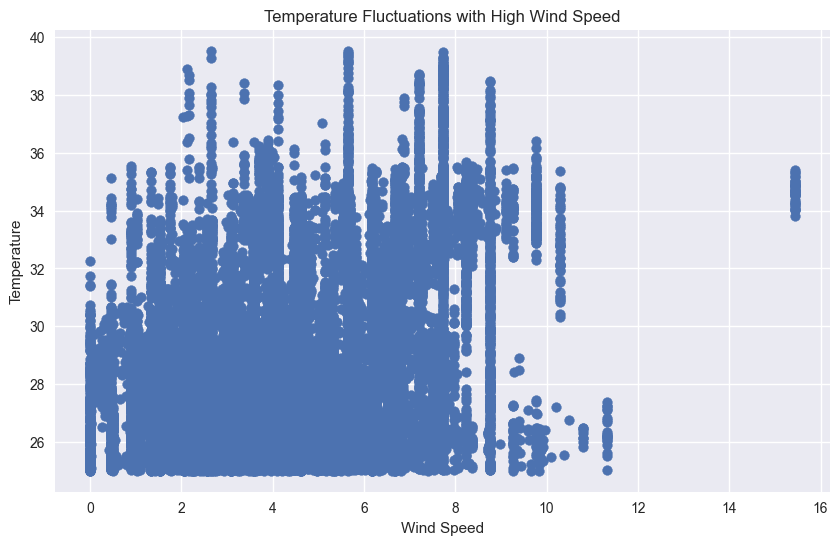

In [65]:
import matplotlib.pyplot as plt

# Set the threshold for high wind speed
high_wind_threshold = 25  # Adjust the threshold as per your data

# Filter the dataframe for high wind speed instances
high_wind_df = merged_df[merged_df['temperature'] >= high_wind_threshold]

# Plot temperature fluctuations against wind speed
plt.figure(figsize=(10, 6))
plt.scatter(high_wind_df['wind_speed'], high_wind_df['temperature'])
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Temperature Fluctuations with High Wind Speed')
plt.show();
